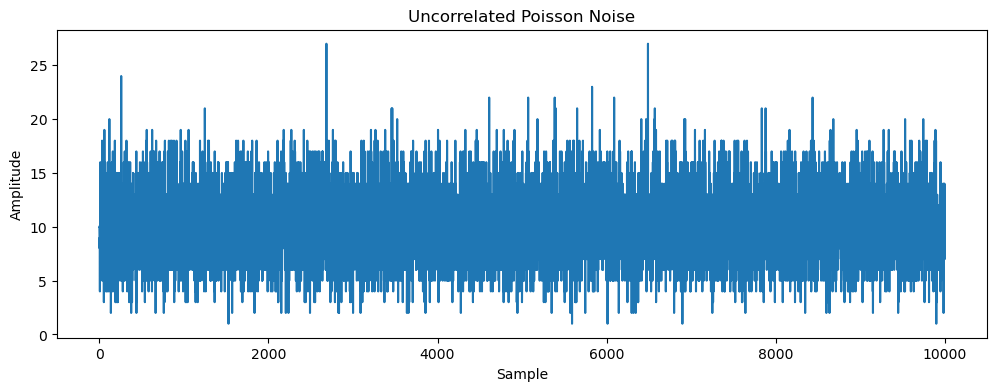

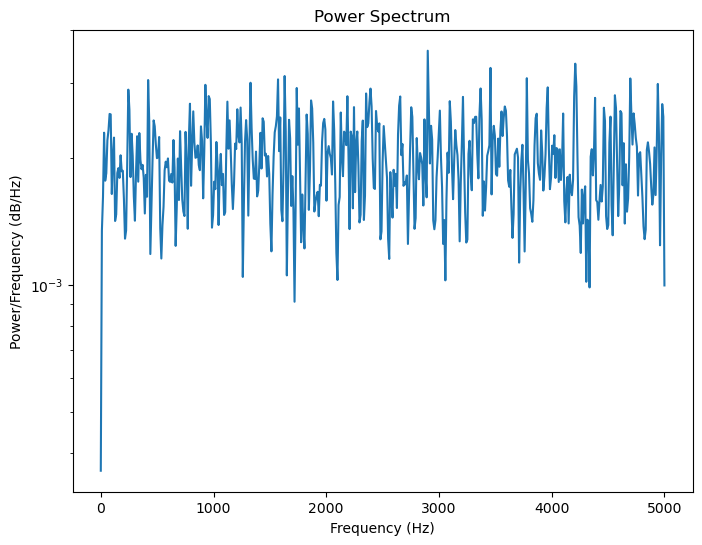

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import scipy.signal as signal

# Base Noise class
class Noise:
    def __init__(self, framerate):
        self.framerate = framerate

# Derived class UncorrelatedPoissonNoise
class UncorrelatedPoissonNoise(Noise):
    def __init__(self, framerate, amp):
        super().__init__(framerate)
        self.amp = amp

    def evaluate(self, duration):
        num_samples = int(duration * self.framerate)
        lam = self.amp * self.framerate
        samples = np.random.poisson(lam, num_samples)
        return samples

# Parameters
framerate = 10000  # 10 kHz framerate
duration = 1  # 1 second duration
amp = 0.001  # Amplitude (lam) for Poisson distribution

# Generate Uncorrelated Poisson Noise
poisson_noise = UncorrelatedPoissonNoise(framerate, amp)
samples = poisson_noise.evaluate(duration)

# Plot the generated noise
plt.figure(figsize=(12, 4))
plt.plot(samples)
plt.title("Uncorrelated Poisson Noise")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()

# Compute and plot the power spectrum
frequencies, power_spectrum = signal.welch(samples, fs=framerate, nperseg=1024)
plt.figure(figsize=(8, 6))
plt.semilogy(frequencies, power_spectrum)
plt.title("Power Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (dB/Hz)")
plt.show()

# Save the audio file
scaled_samples = np.int16(samples / np.max(np.abs(samples)) * 32767)
write("uncorrelated_poisson_noise.wav", framerate, scaled_samples)

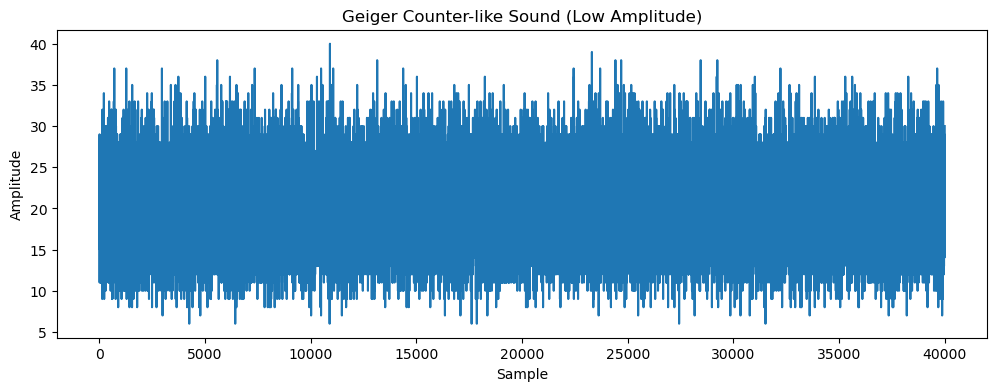

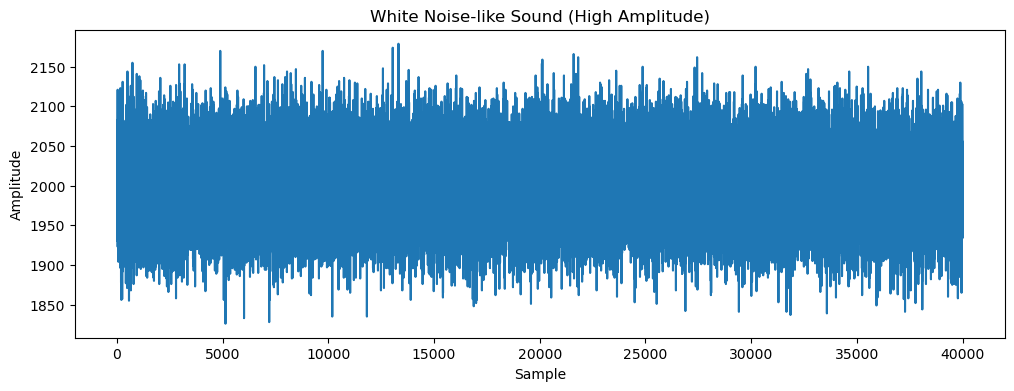

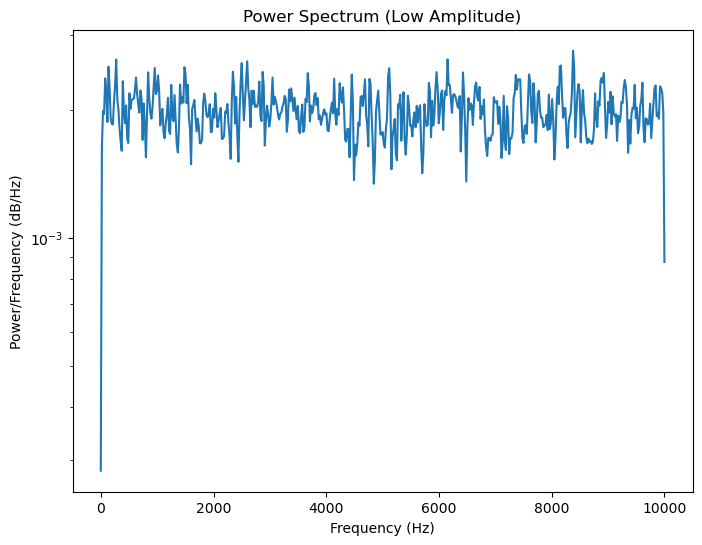

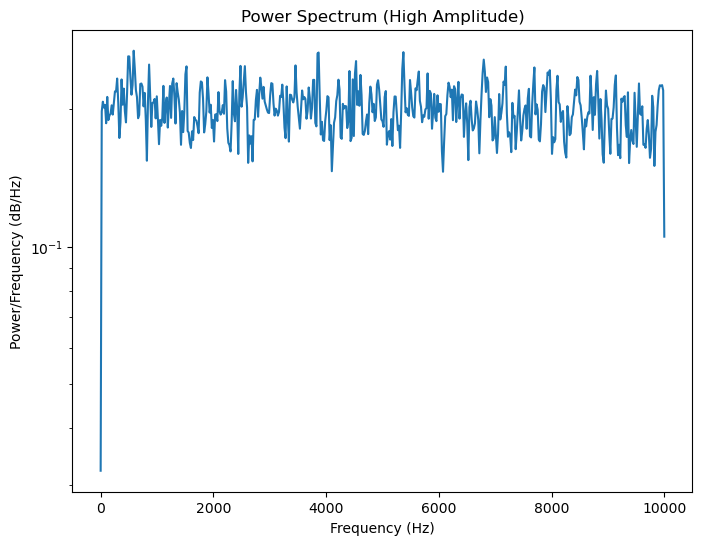

Audio files saved as geiger_counter.wav and white_noise.wav.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import scipy.signal as signal

# Base _Noise class
class _Noise:
    def __init__(self, framerate):
        self.framerate = framerate

# Derived class UncorrelatedPoissonNoise
class UncorrelatedPoissonNoise(_Noise):
    def __init__(self, framerate, amp):
        super().__init__(framerate)
        self.amp = amp

    def evaluate(self, duration):
        num_samples = int(duration * self.framerate)
        lam = self.amp * self.framerate
        samples = np.random.poisson(lam, num_samples)
        return samples

# Parameters
framerate = 20000  # 10 kHz framerate
duration = 2  # 1 second duration

# Low amplitude (Geiger counter-like sound)
low_amp = 0.001
poisson_low_amp = UncorrelatedPoissonNoise(framerate, low_amp)
low_amp_samples = poisson_low_amp.evaluate(duration)

# High amplitude (white noise-like sound)
high_amp = 0.1
poisson_high_amp = UncorrelatedPoissonNoise(framerate, high_amp)
high_amp_samples = poisson_high_amp.evaluate(duration)

# Save audio files for low and high amplitude noises
write("geiger_counter.wav", framerate, low_amp_samples)
write("white_noise.wav", framerate, high_amp_samples)

# Plot low amplitude noise
plt.figure(figsize=(12, 4))
plt.plot(low_amp_samples)
plt.title("Geiger Counter-like Sound (Low Amplitude)")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()

# Plot high amplitude noise
plt.figure(figsize=(12, 4))
plt.plot(high_amp_samples)
plt.title("White Noise-like Sound (High Amplitude)")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()

# Plot the power spectrum for low amplitude noise
frequencies_low, power_spectrum_low = signal.welch(low_amp_samples, fs=framerate, nperseg=1024)
plt.figure(figsize=(8, 6))
plt.semilogy(frequencies_low, power_spectrum_low)
plt.title("Power Spectrum (Low Amplitude)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (dB/Hz)")
plt.show()

# Plot the power spectrum for high amplitude noise
frequencies_high, power_spectrum_high = signal.welch(high_amp_samples, fs=framerate, nperseg=1024)
plt.figure(figsize=(8, 6))
plt.semilogy(frequencies_high, power_spectrum_high)
plt.title("Power Spectrum (High Amplitude)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (dB/Hz)")
plt.show()

print("Audio files saved as geiger_counter.wav and white_noise.wav.")
